In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import os
%matplotlib inline
sns.set()

In [69]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [22]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


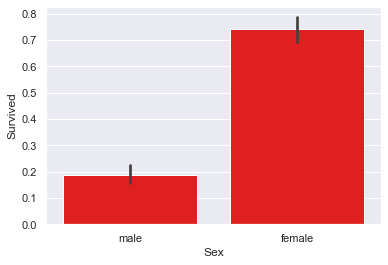

In [34]:
sns.barplot(x='Sex', y= 'Survived', data=df_train, color='red')

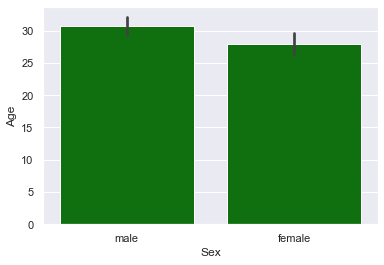

In [35]:
sns.barplot(x='Sex', y= 'Age', data=df_train, color='green')

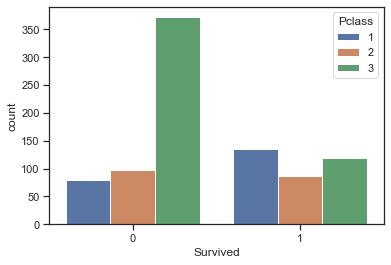

In [39]:
sns.set_style("ticks", {"xtick.major.size": 10, "ytick.major.size": 9})
sns.countplot(x='Survived', hue='Pclass', data=df_train) # the people who did not survive were from the 3rd Class and the
# the one that did survive were in the 1st and 2nd class.

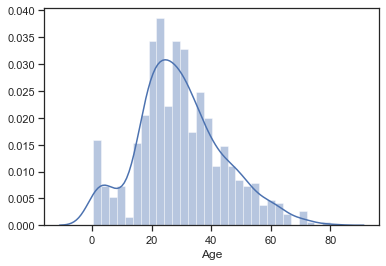

In [40]:
sns.distplot(df_train['Age'].dropna(), kde=True, bins=30) # bimodal distribution, ages 0-10 and average age 20-30, as the older the lesser 
#individuals

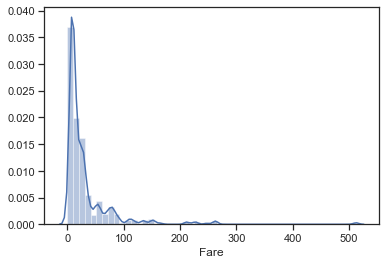

In [77]:
sns.distplot(df_train['Fare'].dropna(), kde=True, bins=50)

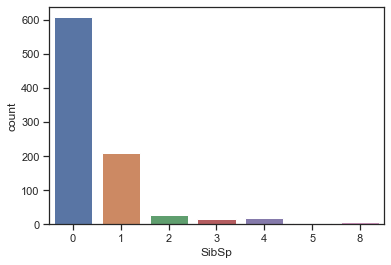

In [173]:
sns.countplot(x='SibSp', data= df_train, orient=True) # Most people did not have children or a spouse. Alot of single people, possible men in the 3rd class. 

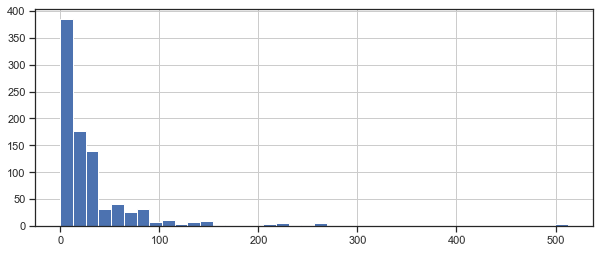

In [42]:
#how much people paid with the distribution, Most of the fairs are between 0-50.
df_train['Fare'].hist(bins=40, figsize=(10,4), xrot=True)

In [43]:
import cufflinks as cf

In [44]:
cf.go_offline()

In [177]:
df_train['SibSp'].iplot(kind='scatter', bins=30, title='Sibling',xTitle='Passenger ID',
    yTitle='Age',)

In [178]:
df_train['Fare'].iplot(kind='hist', bins=30, title='Fare',xTitle='Fare Cost',
    yTitle='Individual')

In [180]:
df_train['Fare'].iplot(kind='scatter', color='Blue', bins=30, title='Fare',xTitle='Passenger ID',
    yTitle='Cost',)

In [201]:
df_train['Age'].iplot(kind='hist', bins=30, title='Age',xTitle='Age',
    yTitle='Number of Passengers') 

In [205]:
df_train['Age'].count()

714

In [184]:
df_train['Age'].iplot(kind='scatter', color='Blue', bins=30, title='Age', xTitle='Passenger Number',
    yTitle='Age') 

In [185]:
df_train['Age'].iplot(kind='box', color='Blue', bins=30, title="Age",xTitle='Age',
    yTitle='IQR') 

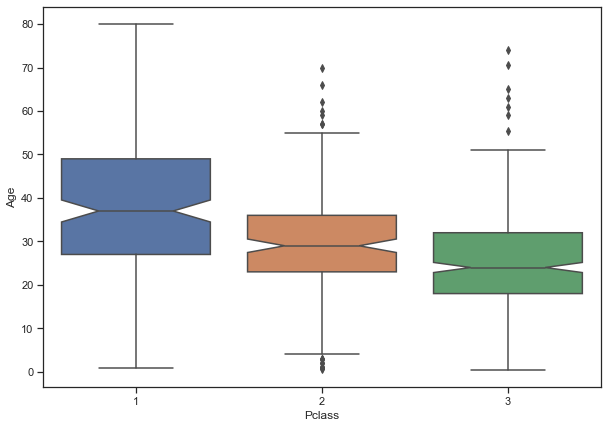

In [199]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age',data=df_train, notch=True)

In [202]:
df_train.corr()  #pearson correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [197]:
df_train.corr().iplot(kind='heatmap', color='blue')

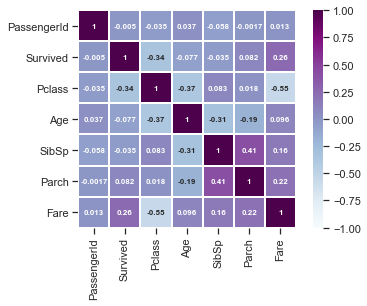

In [198]:
sns.heatmap(df_train.corr(), cbar=True, cmap='BuPu',square=True, linewidth=1,  center=0, vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':8,'fontweight':'bold'})

In [206]:
df_train['Pclass'].count()

891

In [186]:
df_train['Pclass'].iplot(kind='hist', bins=30, title='Passenger Class',xTitle='Passenger Class',
    yTitle='Number of Passengers') 

In [207]:
df_train['Embarked'].count()

889

In [187]:
df_train['Embarked'].iplot(kind='hist', bins=30,xTitle='Origin of Port',
    yTitle='Number of Passengers') 

In [208]:
df_train['Sex'].count()

891

In [188]:
df_train['Sex'].iplot(kind='hist', bins=30,xTitle='Gender',
    yTitle='Count') 

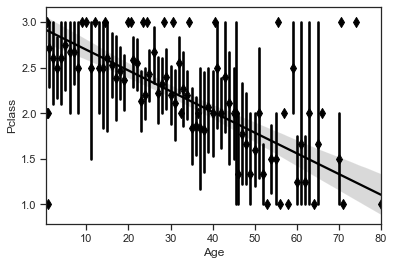

In [126]:
sns.regplot(df_train['Age'],df_train['Pclass'], data=df_train, x_estimator=np.mean, robust=True, marker='d',
            color='Black')

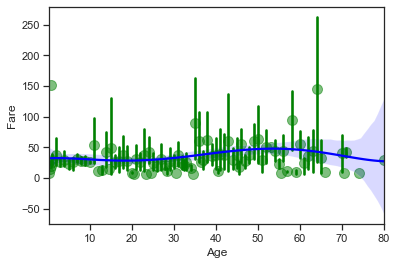

In [114]:
sns.regplot(df_train['Age'],df_train['Fare'], data=df_train, x_estimator=np.mean, order= 5, scatter_kws={'s': 100, 'alpha': 0.5, 
                                                                                       'color': 'green'}, 
            color='Blue')# using robust regression to now plot to the majority of the data points

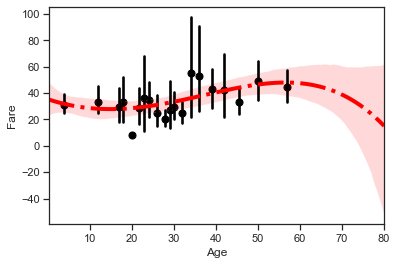

In [113]:
sns.regplot(df_train['Age'],df_train['Fare'], line_kws={'lw':4, 'color': 'red', 'linestyle': '-.'}, 
            x_bins=20,data=df_train, x_estimator=np.mean, order= 4,color='Black')

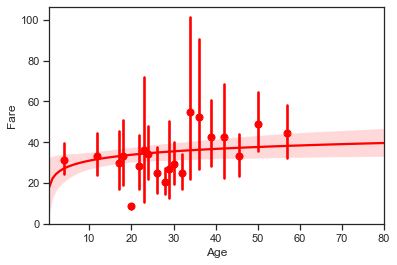

In [127]:
sns.regplot(df_train['Age'],df_train['Fare'], data=df_train, x_estimator=np.mean, x_bins=20, logx=True, color='Red') # plot this logistic relationship, by plotting the original x's that were scattered.